# Analysis of Donald Trump's Tweets 

### Question 1

## Read the dataset into a dataframe

Read the dataset **'trump_twitter.csv'** into a dataframe with name **trump_df** using pandas.

In [1]:

import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
trump_df = pd.read_csv('./trump_twitter.csv')
# trump_df['id'].astype('str')

In [8]:
trump_df

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


In [ ]:
trump_df

,id,created_at,text
0,7.656299e+17,8/16/2016 19:22:57,"It's just a 2-point race, Clinton 38%, Trump 3..."
1,7.587319e+17,7/28/2016 18:32:31,"""@LallyRay: Poll: Donald Trump Sees 17-Point P..."
2,7.583505e+17,7/27/2016 17:16:56,Great new poll - thank you!\n#MakeAmericaGreat...
3,7.575775e+17,7/25/2016 14:05:27,Great POLL numbers are coming out all over. Pe...
4,7.536034e+17,7/14/2016 14:53:46,Another new poll. Thank you for your support! ...
5,7.535803e+17,7/14/2016 13:21:48,Great new poll- thank you America!\n#Trump2016...
6,7.533533e+17,7/13/2016 22:19:48,Despite spending $500k a day on TV ads alone #...
7,7.526186e+17,7/11/2016 21:40:30,Great poll- Florida! Thank you! https://t.co/4...
8,7.518893e+17,7/9/2016 21:22:25,New poll - thank you! #Trump2016\nhttps://t.co...
9,7.481639e+17,6/29/2016 14:39:13,New Q poll out- we are going to win the whole ...


In [9]:
cols=['mentions','hashtags', 'geo','id','link']

In [10]:
trump_df.drop(columns=cols,inplace=True)

In [11]:
trump_df

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965
...,...,...,...,...
41117,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571
41119,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944
41120,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921


### Question 2

## Trump is really excited for running as President. 

Find the percentage of tweets with **atleast one '!'**.

In [12]:
ndf = trump_df.loc[trump_df['content'].str.contains("!", case=False)]

In [13]:
ndf

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
17,Did you know Donald Trump is on Facebook? http...,2009-05-23 18:11:19,54,77
24,Today is Donald Trump's Birthday! Send him you...,2009-06-14 16:25:36,17,16
...,...,...,...,...
41117,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571
41119,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944
41120,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921


In [14]:
#length of ndf divided by length of trump_df
(20204/41122)*100

49.1318515636399

In [ ]:
# Write your code here to get the desired output mentioned below

52.00892857142857 %


### Question 3

## Number of Tweets Donald Trump posted per day

Plot the number of tweets per day trump posted.

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html


In [15]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    41122 non-null  object
 1   date       41122 non-null  object
 2   retweets   41122 non-null  int64 
 3   favorites  41122 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [16]:
year=[]
month=[]
date=[]
hour=[]
minute=[]
second=[]
for x in trump_df['date']:
    year.append(int(x.split("-")[0]))
    month.append(int(x.split("-")[1]))
    date.append(int(x.split("-")[2].split(" ")[0]))
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))
    minute.append(int(x.split("-")[2].split(" ")[1].split(":")[1]))
    second.append(int(x.split("-")[2].split(" ")[1].split(":")[2]))

trump_df['year']=year
trump_df['month']=month
trump_df['dates']=date
trump_df['hour']=hour
trump_df['minute']=minute
trump_df['second']=second
#trump_df.drop(['date'],axis=1,inplace=True)

In [17]:
trump_df['date'] = pd.to_datetime(trump_df['date'],format='%Y-%m-%d')

In [ ]:
#trump_df['month'] = pd.DatetimeIndex(trump_df['date']).month

In [ ]:
#trump_df['day'] = pd.DatetimeIndex(trump_df['date']).day

In [18]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    41122 non-null  object        
 1   date       41122 non-null  datetime64[ns]
 2   retweets   41122 non-null  int64         
 3   favorites  41122 non-null  int64         
 4   year       41122 non-null  int64         
 5   month      41122 non-null  int64         
 6   dates      41122 non-null  int64         
 7   hour       41122 non-null  int64         
 8   minute     41122 non-null  int64         
 9   second     41122 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 3.1+ MB


In [19]:
mnth_df = trump_df.groupby(pd.Grouper(key='date', freq='1M')).count()

In [20]:
mnth_df.reset_index(inplace=True)

In [21]:
mnth_df

,date,content,retweets,favorites,year,month,dates,hour,minute,second
0,2009-05-31,21,21,21,21,21,21,21,21,21
1,2009-06-30,11,11,11,11,11,11,11,11,11
2,2009-07-31,5,5,5,5,5,5,5,5,5
3,2009-08-31,7,7,7,7,7,7,7,7,7
4,2009-09-30,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
124,2019-09-30,475,475,475,475,475,475,475,475,475
125,2019-10-31,594,594,594,594,594,594,594,594,594
126,2019-11-30,411,411,411,411,411,411,411,411,411
127,2019-12-31,439,439,439,439,439,439,439,439,439


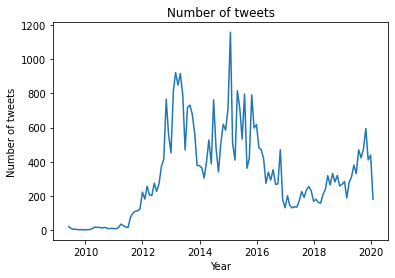

In [22]:
import matplotlib.pyplot as plt
plt.plot(mnth_df['date'], mnth_df['content'])
plt.title('Number of tweets')
plt.xlabel('Year')
plt.ylabel('Number of tweets')
plt.show()

In [23]:
day_df = trump_df.groupby(pd.Grouper(key='date', freq='1D')).count()

In [24]:
day_df.reset_index(inplace=True)

In [25]:
day_df

,date,content,retweets,favorites,year,month,dates,hour,minute,second
0,2009-05-04,1,1,1,1,1,1,1,1,1
1,2009-05-05,1,1,1,1,1,1,1,1,1
2,2009-05-06,0,0,0,0,0,0,0,0,0
3,2009-05-07,0,0,0,0,0,0,0,0,0
4,2009-05-08,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
3909,2020-01-16,10,10,10,10,10,10,10,10,10
3910,2020-01-17,15,15,15,15,15,15,15,15,15
3911,2020-01-18,9,9,9,9,9,9,9,9,9
3912,2020-01-19,9,9,9,9,9,9,9,9,9


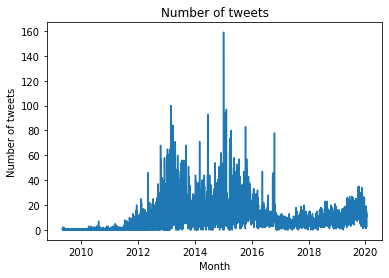

In [26]:
plt.plot(day_df['date'], day_df['content'])
plt.title('Number of tweets')
plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.show()

In [ ]:
#trump_df['monthday'] = trump_df['day'].astype(str) +'-'+ trump_df['month'].astype(str)

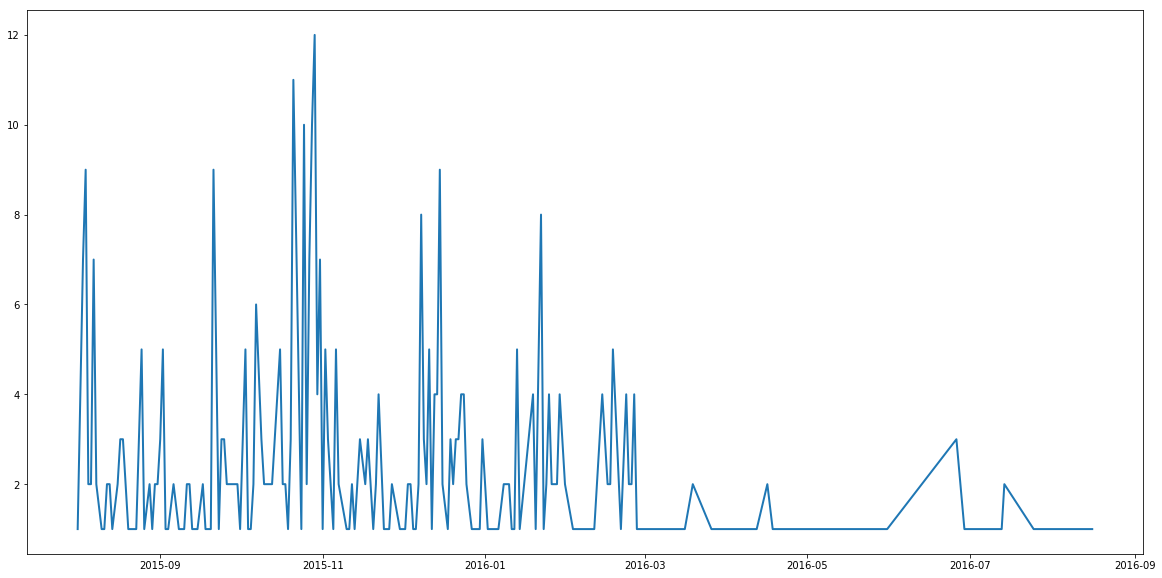

In [ ]:
# Write your code here to get the desired output mentioned below
plt.show()

### Question - 04

Remove weird spaces, stopwords and perform basic pre-processing - spelling correction, etc. 

#removing weird space

In [27]:
def remove_spaces(text):
    text=text.strip()
    text=text.split()
    return ' '.join(text)

#spelling correction

In [28]:
def edits1(word):
    letters='abcdefghijklmnopqrstuvwxyz'
    splits=[(word[:i], word[i:]) for i in range(len(word)+1)]
    deletes=[L+R[1:] for L,R in splits if R]
    transposes=[L+R[1] +R[0] + R[2:] for L,R in splits if len(R)>1]
    replaces = [L+c+R[1:] for L,R in splits if R for c in letters]
    inserts = [L+c+ R for L,R in splits for c in letters]
    return set(deletes+transposes+replaces+inserts)
def edits2(word):
    return(e2 for e1 in edits1(word) for e2 in edits1(e1))

#contraction

In [29]:
contraction = {'cause':'because',
              'aint': 'am not',
              'aren\'t': 'are not'}

def mapping_replacer(x,dic):
    for words in dic.keys():
        if ' ' + words + ' ' in x:
            x=x.replace(' '+ words +' ' ,' '+dic[words]+' ' )
    return x

### Question - 05

In [ ]:
Perform Stemming or Lemmatization, comment on the different outputs.

In [30]:
import nltk
nltk.download('punkit')
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()
def lexicon_normalization(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming
    words_stem = [ls.stem(w) for w in words]
    
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem

[nltk_data] Error loading punkit: Package 'punkit' not found in index


#Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

In [31]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    return text

# removing stop words



In [32]:
from collections import Counter
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

#tokenizing

In [33]:
def tokenise(text):
    words = word_tokenize(text) 
    return words

#cleaning regex

In [34]:
import re
trump_df['content'] = trump_df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
trump_df['content'] = trump_df['content'].replace(r'\W+', ' ', regex=True)

In [35]:
trump_df['content']=trump_df['content'].apply(lambda x: mapping_replacer(x, contraction))

In [36]:
trump_df['content'] = trump_df['content'].apply(lambda x:clean_text(x))

In [37]:
trump_df['content']=trump_df['content'].apply(lambda x: remove_stopword(x))

In [38]:
trump_df['content']=trump_df['content'].apply(lambda x: lexicon_normalization(x))

In [39]:
trump_df

,content,date,retweets,favorites,year,month,dates,hour,minute,second
0,"[sur, tun, watch, donald, trump, lat, night, d...",2009-05-04 20:54:25,500,868,2009,5,4,20,54,25
1,"[donald, trump, appear, view, tomorrow, morn, ...",2009-05-05 03:00:10,33,273,2009,5,5,3,0,10
2,"[donald, trump, read, top, ten, fin, tip, lat,...",2009-05-08 15:38:08,12,18,2009,5,8,15,38,8
3,"[new, blog, post, celebr, appr, fin, lesson, l...",2009-05-08 22:40:15,11,24,2009,5,8,22,40,15
4,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965,2009,5,12,16,7,28
...,...,...,...,...,...,...,...,...,...,...
41117,"[nev, seen, republ, party, strong, un, right, ...",2020-01-19 19:24:52,32620,213817,2020,1,19,19,24,52
41118,"[min, mik, bloomberg, crit, jack, wilson, sav,...",2020-01-19 22:12:20,36239,149571,2020,1,19,22,12,20
41119,"[thrilled, back, gre, stat, texa, tonight, peo...",2020-01-20 01:27:07,16588,66944,2020,1,20,1,27,7
41120,"[hous, presid, got, le, due, process, ter, got...",2020-01-20 02:16:00,20599,81921,2020,1,20,2,16,0


### Question - 06

In [ ]:
Plot a grpah to visualize the most common words used by Donald Trump in his tweets.

In [40]:
top = Counter([item for sublist in trump_df['content'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Commonwords','count']
temp.style.background_gradient(cmap='Blues')

,Commonwords,count
0,realdonaldtrump,8741
1,com,8422
2,http,7138
3,trump,6472
4,gre,6444
5,thank,5134
6,twit,4770
7,u,3849
8,presid,3481
9,new,3268


In [42]:
fig = px.bar(temp, x="count", y="Commonwords", title='Commmon Words', orientation='h', 
             width=700, height=700,color='Commonwords')
fig.show()

### Question - 07

Using sentiment.polarity_score function, Find the polarity score of all the tweets and categorize them as Positive, Negative or Neutral.

In [43]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

from textblob import TextBlob

def get_tweet_sentiment(tweet): 
    
    analysis = TextBlob(tweet) 
    
    
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [44]:
trump_df['sentiment']=trump_df['content'].apply(lambda x: get_tweet_sentiment(' '.join(x)))

In [45]:
trump_df

,content,date,retweets,favorites,year,month,dates,hour,minute,second,sentiment
0,"[sur, tun, watch, donald, trump, lat, night, d...",2009-05-04 20:54:25,500,868,2009,5,4,20,54,25,positive
1,"[donald, trump, appear, view, tomorrow, morn, ...",2009-05-05 03:00:10,33,273,2009,5,5,3,0,10,positive
2,"[donald, trump, read, top, ten, fin, tip, lat,...",2009-05-08 15:38:08,12,18,2009,5,8,15,38,8,positive
3,"[new, blog, post, celebr, appr, fin, lesson, l...",2009-05-08 22:40:15,11,24,2009,5,8,22,40,15,positive
4,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965,2009,5,12,16,7,28,neutral
...,...,...,...,...,...,...,...,...,...,...,...
41117,"[nev, seen, republ, party, strong, un, right, ...",2020-01-19 19:24:52,32620,213817,2020,1,19,19,24,52,positive
41118,"[min, mik, bloomberg, crit, jack, wilson, sav,...",2020-01-19 22:12:20,36239,149571,2020,1,19,22,12,20,positive
41119,"[thrilled, back, gre, stat, texa, tonight, peo...",2020-01-20 01:27:07,16588,66944,2020,1,20,1,27,7,positive
41120,"[hous, presid, got, le, due, process, ter, got...",2020-01-20 02:16:00,20599,81921,2020,1,20,2,16,0,negative


In [46]:
Positive_sent = trump_df[trump_df['sentiment']=='positive']
Negative_sent = trump_df[trump_df['sentiment']=='negative']
Neutral_sent = trump_df[trump_df['sentiment']=='neutral']

In [47]:
print('Number of tweets with positive sentiment', Positive_sent['sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['sentiment'].count())

Number of tweets with positive sentiment 15070
Number of tweets with negative sentiment 6755
Number of tweets with neutral sentiment 19297


### Question - 08

Using wordcloud or other visualization techniques, Find the most common words used positive and negative tweets

#positive

In [48]:
top = Counter([item for sublist in Positive_sent['content'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Commonwords','count']
temp_positive.style.background_gradient(cmap='Greens')

,Commonwords,count
0,realdonaldtrump,3011
1,gre,2652
2,new,2650
3,trump,2637
4,com,2523
5,http,2153
6,good,1593
7,u,1586
8,thank,1563
9,win,1409


#negative

In [49]:
top = Counter([item for sublist in Negative_sent['content'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Commonwords','count']
temp_negative.style.background_gradient(cmap='Reds')

,Commonwords,count
1,u,902
2,com,876
3,http,826
4,gre,824
5,realdonaldtrump,774
6,trump,751
7,peopl,625
8,new,618
9,mad,614
10,presid,598


### Question - 09

Based on the polarity scores of every tweet, plot the mean positivity / negativity scores with respect to year.

In [50]:
year_df = trump_df.groupby(pd.Grouper(key='date', freq='1Y')).count()

In [51]:
year_df.reset_index(inplace=True)

In [52]:
year_df

,date,content,retweets,favorites,year,month,dates,hour,minute,second,sentiment
0,2009-12-31,56,56,56,56,56,56,56,56,56,56
1,2010-12-31,143,143,143,143,143,143,143,143,143,143
2,2011-12-31,870,870,870,870,870,870,870,870,870,870
3,2012-12-31,4190,4190,4190,4190,4190,4190,4190,4190,4190,4190
4,2013-12-31,8207,8207,8207,8207,8207,8207,8207,8207,8207,8207
5,2014-12-31,5987,5987,5987,5987,5987,5987,5987,5987,5987,5987
6,2015-12-31,7719,7719,7719,7719,7719,7719,7719,7719,7719,7719
7,2016-12-31,3951,3951,3951,3951,3951,3951,3951,3951,3951,3951
8,2017-12-31,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232
9,2018-12-31,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998


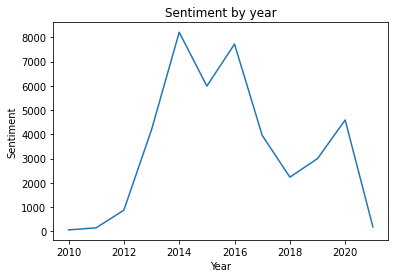

In [53]:
plt.plot(year_df['date'], year_df['sentiment'])
plt.title('Sentiment by year')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.show()

### Question - 10

Split the dataset into train / test set and perform feature engineering to get the top features (or create new features, if required)

In [ ]:
trump_df

,content,date,retweets,favorites,year,month,dates,hour,minute,second,sentiment
0,"[sur, tun, watch, donald, trump, lat, night, d...",2009-05-04 20:54:25,500,868,2009,5,4,20,54,25,positive
1,"[donald, trump, appear, view, tomorrow, morn, ...",2009-05-05 03:00:10,33,273,2009,5,5,3,0,10,positive
2,"[donald, trump, read, top, ten, fin, tip, lat,...",2009-05-08 15:38:08,12,18,2009,5,8,15,38,8,positive
3,"[new, blog, post, celebr, appr, fin, lesson, l...",2009-05-08 22:40:15,11,24,2009,5,8,22,40,15,positive
4,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965,2009,5,12,16,7,28,neutral
...,...,...,...,...,...,...,...,...,...,...,...
41117,"[nev, seen, republ, party, strong, un, right, ...",2020-01-19 19:24:52,32620,213817,2020,1,19,19,24,52,positive
41118,"[min, mik, bloomberg, crit, jack, wilson, sav,...",2020-01-19 22:12:20,36239,149571,2020,1,19,22,12,20,positive
41119,"[thrilled, back, gre, stat, texa, tonight, peo...",2020-01-20 01:27:07,16588,66944,2020,1,20,1,27,7,positive
41120,"[hous, presid, got, le, due, process, ter, got...",2020-01-20 02:16:00,20599,81921,2020,1,20,2,16,0,negative


In [69]:
X=trump_df.content
y=trump_df.sentiment

In [70]:
y=pd.get_dummies(y,drop_first=True)

In [71]:
y

,neutral,positive
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
41117,0,1
41118,0,1
41119,0,1
41120,0,0


In [63]:
#X=X.values

In [64]:
#y=y.values

In [73]:
X=X.astype(str)

In [74]:
X

0        ['sur', 'tun', 'watch', 'donald', 'trump', 'la...
1        ['donald', 'trump', 'appear', 'view', 'tomorro...
2        ['donald', 'trump', 'read', 'top', 'ten', 'fin...
3        ['new', 'blog', 'post', 'celebr', 'appr', 'fin...
4        ['person', 'nev', 'wallflow', 'rath', 'build',...
                               ...                        
41117    ['nev', 'seen', 'republ', 'party', 'strong', '...
41118    ['min', 'mik', 'bloomberg', 'crit', 'jack', 'w...
41119    ['thrilled', 'back', 'gre', 'stat', 'texa', 't...
41120    ['hous', 'presid', 'got', 'le', 'due', 'proces...
41121    ['gre', 'show', 'check', 'tonight', 'foxnewsht...
Name: content, Length: 41122, dtype: object

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X)

# transform the training and validation data using count vectorizer object
X1 =  count_vect.transform(X)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

### Question - 11

In [ ]:
Train a Machine learning model using KNN, Decision tree, SVM and Random Forest. 

#knn

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred = classifier.predict(X_test)

#decision tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred1 = dtree.predict(X_test)

#svm

In [90]:
from sklearn import svm
clf = svm.SVC(kernel='poly') 
clf.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
y_pred2 = clf.predict(X_test)

AttributeError: ignored

#random forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

rclf=RandomForestClassifier(n_estimators=100)

rclf.fit(X_train,y_train)

y_pred3 =rclf.predict(X_test)

### Question - 12

Deduce the model evaluation of all the models and discuss the results for confusion matrix, accuracy score, Recall and Precision.

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

#knn

In [81]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.52      0.99      0.68      5785
           1       0.89      0.17      0.29      4532

   micro avg       0.54      0.63      0.58     10317
   macro avg       0.70      0.58      0.48     10317
weighted avg       0.68      0.63      0.51     10317
 samples avg       0.53      0.53      0.53     10317



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



In [96]:
acc=accuracy_score(y_test, y_pred)

In [97]:
acc

0.5456756099537975

#decision tree

In [85]:
print("Classification report - \n", classification_report(y_test,y_pred1))

Classification report - 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5785
           1       0.95      0.96      0.96      4532

   micro avg       0.97      0.98      0.98     10317
   macro avg       0.97      0.98      0.97     10317
weighted avg       0.97      0.98      0.98     10317
 samples avg       0.82      0.82      0.82     10317



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



In [98]:
acc1=accuracy_score(y_test, y_pred1)

In [99]:
acc1

0.9646591553862365

#random forest

In [92]:
print("Classification report - \n", classification_report(y_test,y_pred3))

Classification report - 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      5785
           1       0.94      0.91      0.93      4532

   micro avg       0.95      0.95      0.95     10317
   macro avg       0.95      0.94      0.95     10317
weighted avg       0.95      0.95      0.95     10317
 samples avg       0.79      0.79      0.79     10317



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



In [100]:
acc3=accuracy_score(y_test, y_pred3)

In [101]:
acc3

0.9240496068736321

#Discussing Results

Decision tree has the best accuracy,precision,recall and f1 score of trained models